Importing Libraries

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from deepchecks.tabular import Dataset
from deepchecks.tabular.checks import DataDuplicates,TrainTestFeatureDrift, FeatureLabelCorrelation

Import Dataset

In [3]:
df=pd.read_csv('Train.csv')

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [6]:
df.shape

(891, 12)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Handling Missing Values

In [10]:
#since so many missing values in cabin column, drop it
df.drop(columns='Cabin',axis=1,inplace=True)

In [11]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [12]:
#use mean for Age column
df['Age'].fillna(df['Age'].mean(), inplace=True)

In [13]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [14]:
#use mode for embarked column as categorical 
print(df['Embarked'].mode())

0    S
Name: Embarked, dtype: object


In [15]:
print(df['Embarked'].mode()[0])

S


In [16]:
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

In [17]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

Data Analysis

In [18]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [19]:
df['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

Visualizing Data

<Axes: xlabel='Survived', ylabel='count'>

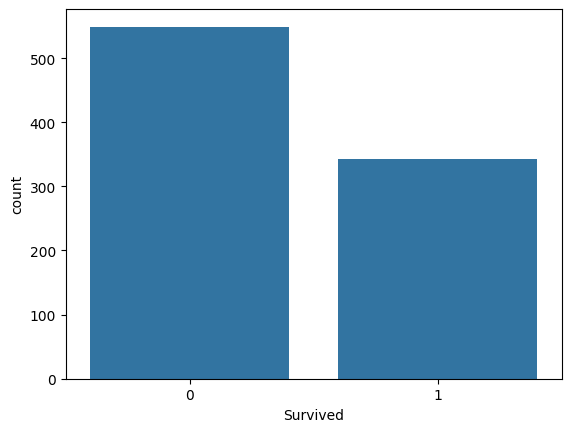

In [20]:
sns.countplot(x='Survived', data=df)

In [21]:
df['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

<Axes: xlabel='Sex', ylabel='count'>

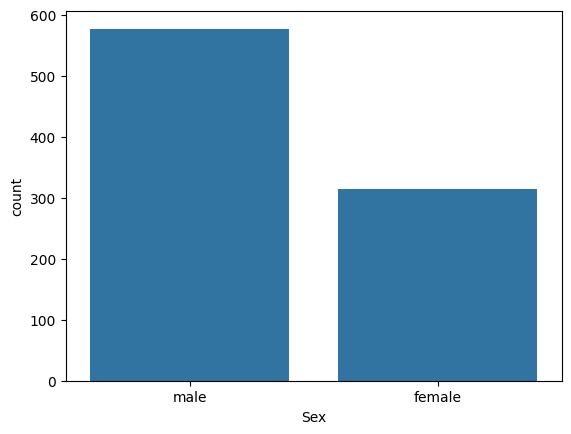

In [22]:
sns.countplot(x='Sex', data=df)

<Axes: xlabel='Sex', ylabel='count'>

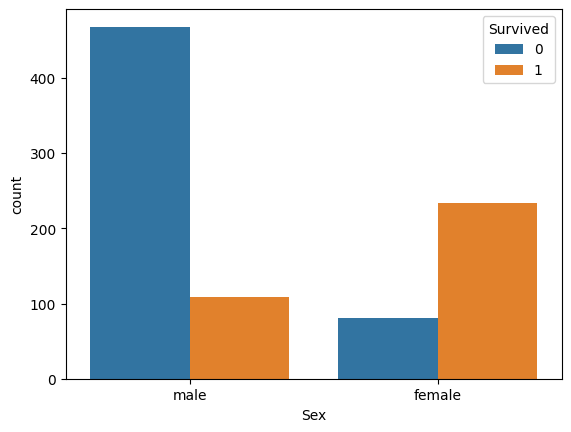

In [23]:
#number of survivors gender wise 
sns.countplot( x='Sex',hue='Survived', data=df)

<Axes: xlabel='Pclass', ylabel='count'>

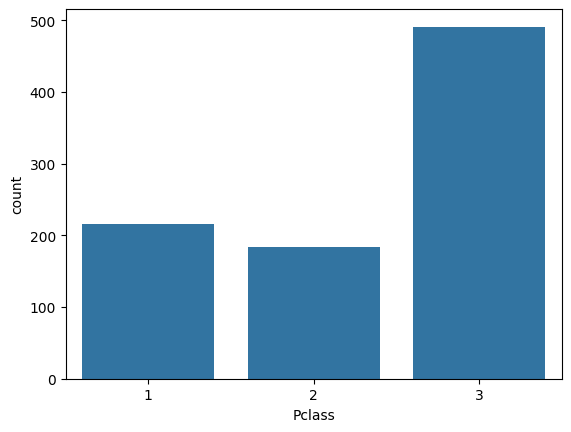

In [24]:
sns.countplot(x= 'Pclass', data=df)

<Axes: xlabel='Pclass', ylabel='count'>

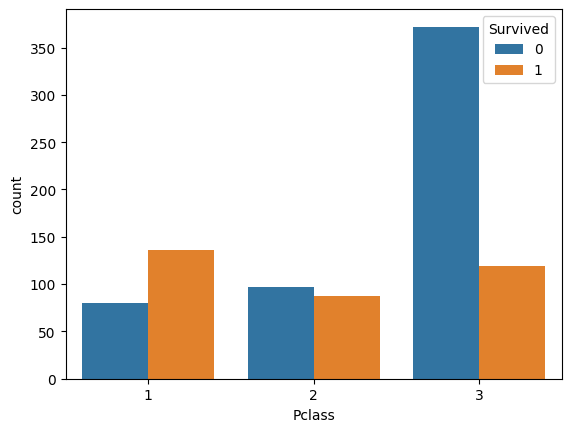

In [25]:
sns.countplot(x= 'Pclass',hue='Survived', data=df)

Label Encoding

In [26]:
df['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [27]:
df['Embarked'].value_counts()

Embarked
S    646
C    168
Q     77
Name: count, dtype: int64

In [28]:
from sklearn.preprocessing import LabelEncoder

encoder=LabelEncoder()

df['Sex']= encoder.fit_transform(df['Sex'])
df['Embarked']= encoder.fit_transform(df['Embarked'])

In [29]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,2


In [30]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
886,887,0,2,"Montvila, Rev. Juozas",1,27.000000,0,0,211536,13.00,2
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.000000,0,0,112053,30.00,2
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,29.699118,1,2,W./C. 6607,23.45,2
889,890,1,1,"Behr, Mr. Karl Howell",1,26.000000,0,0,111369,30.00,0
890,891,0,3,"Dooley, Mr. Patrick",1,32.000000,0,0,370376,7.75,1


Sepearting features and target

In [31]:
X= df.drop(columns=['Name', 'PassengerId', 'Ticket','Survived'], axis=1)
y=df['Survived']

In [32]:

print(X)

     Pclass  Sex        Age  SibSp  Parch     Fare  Embarked
0         3    1  22.000000      1      0   7.2500         2
1         1    0  38.000000      1      0  71.2833         0
2         3    0  26.000000      0      0   7.9250         2
3         1    0  35.000000      1      0  53.1000         2
4         3    1  35.000000      0      0   8.0500         2
..      ...  ...        ...    ...    ...      ...       ...
886       2    1  27.000000      0      0  13.0000         2
887       1    0  19.000000      0      0  30.0000         2
888       3    0  29.699118      1      2  23.4500         2
889       1    1  26.000000      0      0  30.0000         0
890       3    1  32.000000      0      0   7.7500         1

[891 rows x 7 columns]


In [33]:
print(y)

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64


Splitting into training and Testing

In [34]:
X_train , X_test, y_train, y_test=train_test_split(X,y, test_size=0.2, random_state=2)

In [35]:
print(X.shape, X_train.shape, X_test.shape)

(891, 7) (712, 7) (179, 7)


Deepchecks Validation

In [36]:
train_dataset = Dataset(X_train, label=y_train, cat_features=['Sex', 'Embarked', 'Pclass'])
test_dataset = Dataset(X_test, label=y_test, cat_features=['Sex', 'Embarked', 'Pclass'])

In [37]:
# Run data validation checks
duplicates_check = DataDuplicates().run(train_dataset)

# Display check results
duplicates_check.show()

In [38]:
train_test_feature_drift_result = TrainTestFeatureDrift().run(train_dataset, test_dataset)
train_test_feature_drift_result.show()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_11884\304157627.py:1: DeprecationWarning:

The TrainTestFeatureDrift check is deprecated and will be removed in the 0.14 version. Please use the FeatureDrift check instead



In [39]:
feature_label_correlation_result = FeatureLabelCorrelation().run(train_dataset)
feature_label_correlation_result.show()

Logistic Regression

In [40]:
classifier= LogisticRegression()

classifier.fit(X_train, y_train)

LogisticRegression()

In [41]:
train_predict_1=classifier.predict(X_train)
print(train_predict_1)

[0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 1
 0 0 0 0 0 0 1 1 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 1 0 0 1 1 0 0 1 1 0 1 0 0 1
 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 1 0 0 0 1 1 1 0 1 0 0 0 0 0 1 0 0 0
 1 1 0 0 1 0 0 1 0 0 1 0 0 1 0 1 0 1 0 1 0 1 1 1 1 1 1 0 0 1 1 1 0 0 1 0 0
 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 1 0 1 1 1
 0 0 0 1 0 0 0 1 0 0 1 0 0 1 1 1 0 1 0 0 0 0 0 1 1 0 1 1 1 1 0 0 0 0 0 0 0
 0 1 0 0 1 1 1 0 0 1 0 1 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 1 0 0 0
 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 1 1 0 0 0 0 1 0 1 0 0 1 0 0 0 1 0 0 0
 0 1 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 1 1 0 0 0 1 0 1 0 0 0 0 0 0 1 1 0 1 1
 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 0 1 0 0 0 0 1 1 0 0 0 1 0 1 1 1 0 0
 0 0 1 0 0 0 1 1 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 1 1 1 0 1 1 0 0 0
 0 1 0 1 0 0 1 1 0 0 0 0 1 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 1 0 0 0 0 1 1 0 0
 1 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 1 1 0 1 0 0 1 0 0 0 1 1 0 1 0
 0 0 0 0 1 0 0 1 0 1 1 0 

In [42]:
train_accuracy_1= accuracy_score(y_train, train_predict_1)
print("Accuracy on training set is: ",train_accuracy_1)

Accuracy on training set is:  0.8132022471910112


<Axes: >

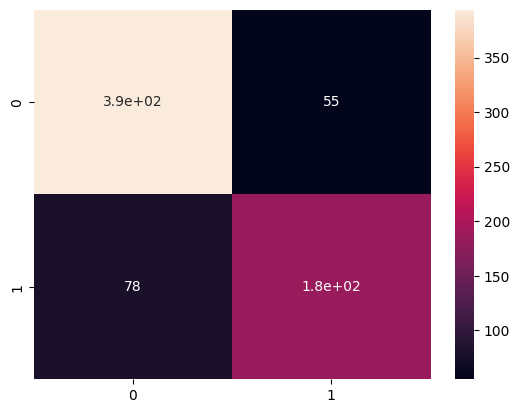

In [43]:
cm=confusion_matrix(y_train,train_predict_1)
sns.heatmap(cm,annot=True)

In [44]:
test_predict_1=classifier.predict(X_test)
print(test_predict_1)

[0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0 1 1 0 1 0 1 1 0 0 0 0 0 0 0 0 1 1
 0 0 0 0 0 1 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 1 0 1 0
 1 0 0 0 1 0 1 0 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 1 0 1 1 0 1 1 0 1 1 0 0 0 0
 0 0 0 1 1 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 1 1 1 1 0 1 0 0
 0 1 0 0 0 0 1 0 0 1 1 0 1 0 0 0 1 1 0 0 1 0 0 1 1 1 0 0 0 0 0]


In [45]:
test_accuracy_1= accuracy_score(y_test, test_predict_1)
print("Accuracy on test set is: ",test_accuracy_1)

Accuracy on test set is:  0.7877094972067039


In [46]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Calculate precision
precision1 = precision_score(y_test, test_predict_1)
print("Precision:", precision1)

# Calculate recall (sensitivity)
recall1 = recall_score(y_test, test_predict_1)
print("Recall (Sensitivity):", recall1)

# Calculate F1-score
f1_1 = f1_score(y_test, test_predict_1)
print("F1-Score:", f1_1)

Precision: 0.847457627118644
Recall (Sensitivity): 0.6329113924050633
F1-Score: 0.7246376811594203


<Axes: >

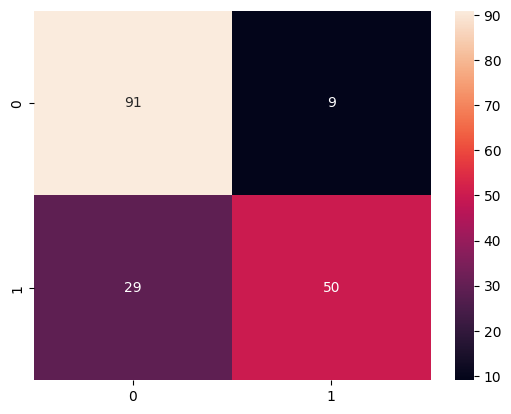

In [47]:
cm=confusion_matrix(y_test,test_predict_1)
sns.heatmap(cm,annot=True)

Naive Bayes

In [48]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [49]:
train_predict_2= gnb.predict(X_train)
print(train_predict_2)

[0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 0 1 0 0 0 1 0 0 1 0 1 0 0 1 0 0 1 0 0 0 0 1
 0 0 1 0 0 0 1 1 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 1 0 0 1 1 0 0 1 1 0 1 0 0 1
 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 1 1 0 0 0 1 1 1 0 1 0 0 1 0 0 1 0 0 0
 1 1 0 0 1 0 0 1 0 0 1 0 0 1 0 1 0 1 0 1 0 1 1 1 1 1 1 1 0 1 1 1 0 1 1 0 0
 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 1 0 1 0 1 1 1
 1 0 0 1 0 1 1 1 1 0 1 0 0 1 1 1 0 1 0 0 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0
 0 1 0 0 0 1 1 0 0 1 0 1 1 1 0 0 1 0 0 0 1 1 0 0 0 1 0 0 0 1 0 1 0 1 1 0 0
 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 1 0 1 0 0 1 0 0 0 1 0 0 0
 0 1 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 1 1 0 1 0 1 0 1 0 0 0 0 0 0 1 1 0 1 1
 0 1 0 1 0 1 0 0 0 0 0 1 0 1 0 0 0 1 1 0 1 0 0 0 0 1 1 0 0 0 1 0 1 1 1 0 0
 0 0 1 0 0 0 1 1 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 1 1 1 0 1 1 1 0 1
 0 1 0 1 0 0 1 1 0 0 0 0 1 0 0 0 0 1 1 0 1 0 1 0 0 0 0 1 1 0 0 0 0 1 1 0 0
 1 0 1 0 0 1 0 0 0 1 0 0 0 0 1 0 0 1 1 0 0 0 0 1 0 1 0 0 1 0 0 0 1 1 0 1 0
 0 1 0 0 1 0 0 1 1 1 1 0 

In [50]:
train_accuracy_2= accuracy_score(y_train, train_predict_2)
print("Accuracy on training set is: ",train_accuracy_2)

Accuracy on training set is:  0.7949438202247191


<Axes: >

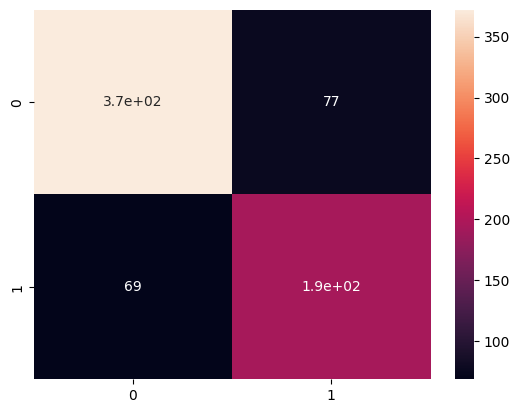

In [51]:
cm=confusion_matrix(y_train,train_predict_2)
sns.heatmap(cm,annot=True)

In [52]:
test_predict_2= gnb.predict(X_test)
print(test_predict_2)

[0 0 1 0 0 0 0 0 1 0 0 1 1 0 0 1 0 0 1 0 1 1 0 1 0 1 1 0 0 0 0 0 0 0 0 1 1
 0 0 0 0 0 1 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 1 0 1 0
 1 0 0 0 1 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 0 1 1 0 1 1 1 0 0 0
 0 1 0 1 1 0 1 0 0 1 0 0 0 0 0 1 1 0 0 0 0 1 1 0 1 0 0 0 0 1 1 1 1 0 1 0 0
 0 1 1 1 0 0 1 0 0 1 1 0 1 0 0 0 1 1 0 0 1 0 0 1 1 1 0 0 0 0 1]


In [53]:
test_accuracy_2= accuracy_score(y_test, test_predict_2)
print("Accuracy on test set is: ",test_accuracy_2)

Accuracy on test set is:  0.770949720670391


In [54]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Calculate precision
precision2= precision_score(y_test, test_predict_2)
print("Precision:", precision2)

# Calculate recall (sensitivity)
recall2 = recall_score(y_test, test_predict_2)
print("Recall (Sensitivity):", recall2)

# Calculate F1-score
f1_2 = f1_score(y_test, test_predict_2)
print("F1-Score:", f1_2)

Precision: 0.7878787878787878
Recall (Sensitivity): 0.6582278481012658
F1-Score: 0.7172413793103448


<Axes: >

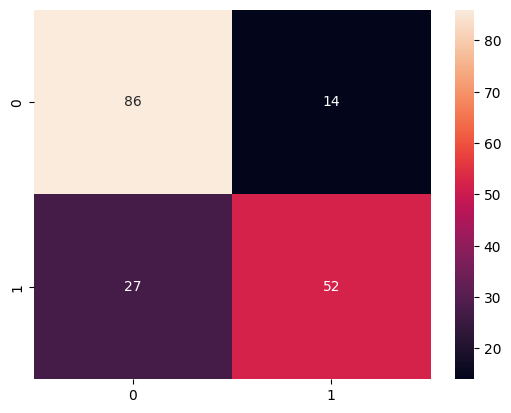

In [55]:
cm=confusion_matrix(y_test,test_predict_2)
sns.heatmap(cm,annot=True)

Random Forest

In [56]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)

RandomForestClassifier()

In [57]:
train_predict_3= rf.predict(X_train)
print(train_predict_3)

[0 1 0 0 0 0 0 1 1 0 0 1 0 0 1 1 1 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1
 0 1 0 0 0 0 1 1 0 0 1 0 1 0 0 1 0 0 0 0 0 1 0 1 0 0 1 1 0 0 1 0 0 1 0 0 1
 0 1 0 0 1 0 1 0 0 0 1 0 0 0 0 0 1 0 1 1 0 0 0 1 0 1 1 1 0 0 0 1 0 1 0 0 0
 1 1 0 0 1 0 0 1 0 1 1 0 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 0 0 1 1 1 0 1 1 0 0
 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 1 0 0 1 1 1 0 1 1 1
 1 0 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 0 0 0 0 1 0 0 1 1 1 1 0 0 0 0 0 0 0
 0 1 0 0 0 1 0 0 1 1 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0
 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 1 1 1 0 0 1 0 0 0 0 1 0 1
 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 1 1 1 0 1 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0
 0 1 1 1 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 1 0 1 1 0 1 0 0 0 1 1 0 1 1 1 0 1
 0 0 1 0 0 0 1 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 1 0 1 1 1 0 1 1 0 0 0
 0 1 1 1 0 0 1 1 0 0 1 0 1 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 1 0 0 1 0 1 1 0 0
 1 1 0 0 0 1 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 1 0 1 0 1 1 0 1 0 0 0 1 1 0 1 0
 0 0 0 0 0 0 0 1 1 1 0 0 

In [58]:
train_accuracy_3= accuracy_score(y_train, train_predict_3)
print("Accuracy on training set is: ",train_accuracy_3)

Accuracy on training set is:  0.9859550561797753


<Axes: >

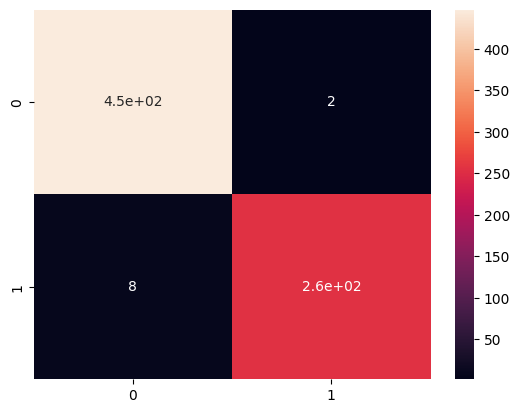

In [59]:
cm=confusion_matrix(y_train,train_predict_3)
sns.heatmap(cm,annot=True)

In [60]:
test_predict_3= rf.predict(X_test)
print(test_predict_3)

[1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 1 1
 0 0 0 0 0 1 0 0 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 1 1 0 0 1 0 1 0 0 0 1 0 1 0
 0 1 0 1 1 1 1 0 0 0 1 1 0 0 1 0 0 1 0 0 0 1 0 1 0 1 1 0 1 1 0 1 1 1 0 0 1
 0 1 0 1 1 0 1 1 0 1 0 0 0 0 0 0 1 0 0 0 1 0 1 0 1 0 0 0 0 1 1 1 1 1 1 0 0
 0 1 0 1 0 0 1 0 1 1 1 0 1 0 1 0 1 1 0 0 1 0 0 1 1 1 0 0 0 0 0]


In [61]:
test_accuracy_3= accuracy_score(y_test, test_predict_3)
print("Accuracy on test set is: ",test_accuracy_3)

Accuracy on test set is:  0.8212290502793296


In [62]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Calculate precision
precision3 = precision_score(y_test, test_predict_3)
print("Precision:", precision3)

# Calculate recall (sensitivity)
recall3 = recall_score(y_test, test_predict_3)
print("Recall (Sensitivity):", recall3)

# Calculate F1-score
f1_3 = f1_score(y_test, test_predict_3)
print("F1-Score:", f1_3)

Precision: 0.8309859154929577
Recall (Sensitivity): 0.7468354430379747
F1-Score: 0.7866666666666666


<Axes: >

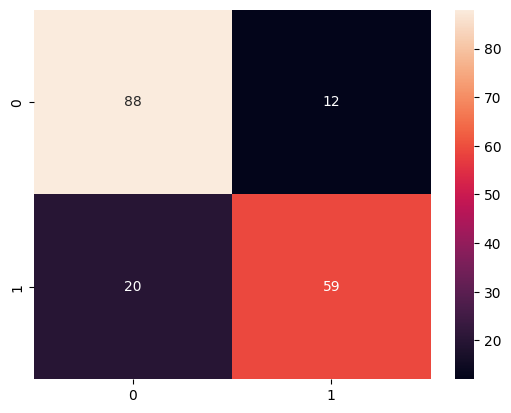

In [63]:
cm=confusion_matrix(y_test,test_predict_3)
sns.heatmap(cm,annot=True)

Comparison of Models

In [64]:
print("Accuracy of Logistic Regression: ", test_accuracy_1)
print("Accuracy of Naive Bayes: ", test_accuracy_2)
print("Accuracy of Random Forest: ", test_accuracy_3)

Accuracy of Logistic Regression:  0.7877094972067039
Accuracy of Naive Bayes:  0.770949720670391
Accuracy of Random Forest:  0.8212290502793296


In [65]:
print("Recall of Logistic Regression: ", recall1)
print("Recall of Naive Bayes: ", recall2)
print("Recall of Random Forest: ", recall3)

Recall of Logistic Regression:  0.6329113924050633
Recall of Naive Bayes:  0.6582278481012658
Recall of Random Forest:  0.7468354430379747


In [66]:
print("F1-score of Logistic Regression: ", f1_1)
print("F1-score of Naive Bayes: ", f1_2)
print("F1- score of Random Forest: ", f1_3)

F1-score of Logistic Regression:  0.7246376811594203
F1-score of Naive Bayes:  0.7172413793103448
F1- score of Random Forest:  0.7866666666666666


Streamlit 

In [67]:
import pickle

In [68]:
pickle.dump(classifier, open('logistic_regression_model.pkl','wb'))

In [69]:
pickle.dump(gnb, open('naive_bayes_model.pkl','wb'))

In [70]:
pickle.dump(rf, open('random_forest_model.pkl','wb'))

Deepchecks Model Validation

In [71]:
from deepchecks.tabular.suites import full_suite

# Run model validation suite
suite = full_suite()
suite.run(train_dataset, test_dataset, classifier).show()

c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\deepchecks\utils\abstracts\weak_segment_abstract.py:57: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Other' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.

c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\deepchecks\utils\abstracts\weak_segment_abstract.py:57: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Other' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.

c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\deepchecks\tabular\checks\train_test_validation\train_test_samples_mix.py:85: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.



Accordion(children=(VBox(children=(HTML(value='\n<h1 id="summary_T1153ILUM7U0WEWS2SLZOEI1Y">Full Suite</h1>\n<…

In [72]:
suite.run(train_dataset, test_dataset, gnb).show()

c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\deepchecks\utils\abstracts\weak_segment_abstract.py:57: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Other' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.

deepchecks - WARNING - Could not find built-in feature importance on the model, using permutation feature importance calculation instead
deepchecks - INFO - Calculating permutation feature importance. Expected to finish in 1 seconds
c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\deepchecks\utils\abstracts\weak_segment_abstract.py:57: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Other' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.

c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\deepc

Accordion(children=(VBox(children=(HTML(value='\n<h1 id="summary_72WXIWYEG1X4E2FALSU4Q26RR">Full Suite</h1>\n<…

In [73]:
suite.run(train_dataset, test_dataset, rf).show()

c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\deepchecks\utils\abstracts\weak_segment_abstract.py:57: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Other' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.

c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\deepchecks\utils\abstracts\weak_segment_abstract.py:57: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Other' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.

c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\deepchecks\tabular\checks\train_test_validation\train_test_samples_mix.py:85: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.



Accordion(children=(VBox(children=(HTML(value='\n<h1 id="summary_IIBQ3CA0Q4K5IPO5PIKXNIHMJ">Full Suite</h1>\n<…

In [74]:
from arize.pandas.logger import Client, Schema

API_KEY = 'bd666b4ca2b254a87af'
SPACE_KEY = '1191379'
arize_client = Client(space_key=SPACE_KEY, api_key=API_KEY)

In [75]:
import datetime
from arize.pandas.logger import Client
from arize.utils.types import ModelTypes, Environments, Schema, Metrics

# Define feature column names from your dataset
feature_column_names = [
    "Pclass",        # Class of Passenger
    "Name",          # Name of Passenger
    "Sex",           # Gender
    "Age",           # Age of passenger
    "SibSp",         # Siblings/Spouses
    "Parch",         # Parents/Children
    "Ticket",        # Ticket
    "Fare",          # Fare of Journey
    "Embarked"       # Picking Point
]

# Define schema
schema = Schema(
    prediction_id_column_name="PassengerId",        # Unique identifier for each prediction
    prediction_label_column_name="Survived",
    actual_label_column_name="Survived",             # Actual label column name (assuming binary classification)
    feature_column_names=feature_column_names,
   
)


In [79]:
df_arize=pd.read_csv('train.csv')
response = arize_client.log(
    dataframe=df_arize,
    schema=schema,
    model_id="titanic_survival_prediction",
    model_version="1.0.0",
    model_type=ModelTypes.BINARY_CLASSIFICATION,
    metrics_validation=[Metrics.CLASSIFICATION],
    validate=True,
    environment=Environments.PRODUCTION
)


  arize.utils.logging | INFO | Success! Check out your data at https://app.arize.com/organizations/QWNjb3VudE9yZ2FuaXphdGlvbjo3NTExOlJrNEs=/spaces/U3BhY2U6NzkxMDpzZ3JR/models/modelName/titanic_survival_prediction?selectedTab=dataIngestion
